# Reading AERONET data with pandas

## Import python packages

In [71]:
import pandas as pd
import s3fs
import xarray as xr

## Connect to bucket (anonymous login for public data only)

In [76]:
fs = s3fs.S3FileSystem(anon=True,
      client_kwargs={
         'endpoint_url': 'https://climate.uiogeo-apps.sigma2.no/'
      })

s3path = 'ESGF/obs4MIPs/AERONET/AeronetSunV3Lev1.5.daily/*.lev30'
remote_files = fs.glob(s3path)

## Access data files

In [77]:
# Iterate through remote_files to create a fileset
fileset = [fs.open(file) for file in remote_files]

## Station selection

In [78]:
# Get index of the first file containing some substring
matching_index = [i for i, s in enumerate(remote_files) if "Lille" in s][0]
matching_index

776

## Data reading with pandas

In [79]:
# Read file with pandas
# Note: One must skip the first rows (skiprows), which do not contain as many columns as data-rows
df = pd.read_csv(fileset[matching_index], skiprows=6)
df.head()

,AERONET_Site,Date(dd:mm:yyyy),Time(hh:mm:ss),Day_of_Year,AOD_1640nm,AOD_1020nm,AOD_870nm,AOD_865nm,AOD_779nm,AOD_675nm,...,N[440-675_Angstrom_Exponent],N[500-870_Angstrom_Exponent],N[340-440_Angstrom_Exponent],N[440-675_Angstrom_Exponent[Polar]],Data_Quality_Level,AERONET_Instrument_Number,AERONET_Site_Name,Site_Latitude(Degrees),Site_Longitude(Degrees),Site_Elevation(m)
0,Lille,01:11:1994,12:00:00,305,-999.0,0.135490,0.146435,-999.0,-999.0,0.158098,...,19,0,0,0,lev15,48,Lille,50.611667,3.141667,60.0
1,Lille,02:11:1994,12:00:00,306,-999.0,0.382259,0.396290,-999.0,-999.0,0.416910,...,6,0,0,0,lev15,48,Lille,50.611667,3.141667,60.0
2,Lille,06:11:1994,12:00:00,310,-999.0,0.092989,0.118270,-999.0,-999.0,0.163379,...,2,0,0,0,lev15,48,Lille,50.611667,3.141667,60.0
3,Lille,07:11:1994,12:00:00,311,-999.0,0.086925,0.108214,-999.0,-999.0,0.145579,...,9,0,0,0,lev15,48,Lille,50.611667,3.141667,60.0
4,Lille,08:11:1994,12:00:00,312,-999.0,0.098722,0.120554,-999.0,-999.0,0.159143,...,10,0,0,0,lev15,48,Lille,50.611667,3.141667,60.0


In [95]:
# Check which keys are available
df.keys()

Index(['AERONET_Site', 'Date(dd:mm:yyyy)', 'Time(hh:mm:ss)', 'Day_of_Year',
       'AOD_1640nm', 'AOD_1020nm', 'AOD_870nm', 'AOD_865nm', 'AOD_779nm',
       'AOD_675nm', 'AOD_667nm', 'AOD_620nm', 'AOD_560nm', 'AOD_555nm',
       'AOD_551nm', 'AOD_532nm', 'AOD_531nm', 'AOD_510nm', 'AOD_500nm',
       'AOD_490nm', 'AOD_443nm', 'AOD_440nm', 'AOD_412nm', 'AOD_400nm',
       'AOD_380nm', 'AOD_340nm', 'Precipitable_Water(cm)', 'AOD_681nm',
       'AOD_709nm', 'AOD_Empty', 'AOD_Empty.1', 'AOD_Empty.2', 'AOD_Empty.3',
       'AOD_Empty.4', '440-870_Angstrom_Exponent', '380-500_Angstrom_Exponent',
       '440-675_Angstrom_Exponent', '500-870_Angstrom_Exponent',
       '340-440_Angstrom_Exponent', '440-675_Angstrom_Exponent[Polar]',
       'N[AOD_1640nm]', 'N[AOD_1020nm]', 'N[AOD_870nm]', 'N[AOD_865nm]',
       'N[AOD_779nm]', 'N[AOD_675nm]', 'N[AOD_667nm]', 'N[AOD_620nm]',
       'N[AOD_560nm]', 'N[AOD_555nm]', 'N[AOD_551nm]', 'N[AOD_532nm]',
       'N[AOD_531nm]', 'N[AOD_510nm]', 'N[AOD_500nm]

## Create proper Date index

In [123]:
# Get date from Date(dd:mm:yyyy)
df['Date'] = pd.to_datetime(df['Date(dd:mm:yyyy)'], format='%d:%m:%Y')

# Set date as index
df.set_index('Date', inplace=True)

## Plot time series using pandas

Text(0, 0.5, 'AOD@500nm')

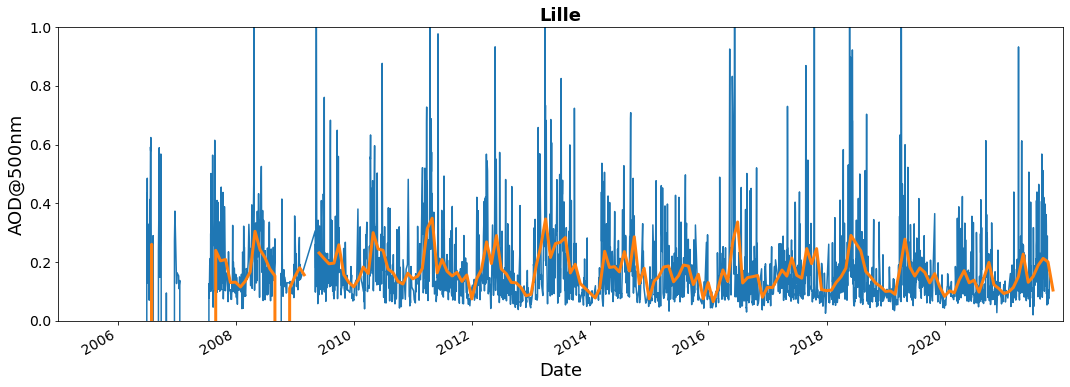

In [145]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(18,6))
df['AOD_500nm'].plot(ylim=(0,1))
df['AOD_500nm'].resample('1M').mean().plot(ylim=(0,1), xlim=('01-01-2005','31-12-2021'), lw=3)
plt.title('Lille', weight='bold')
plt.ylabel('AOD@500nm')